# Creadit risk prediction
## Goal: make a model to predict a loan default probability for an individual

# Import and download data section

In [197]:
import numpy as np
import matplotlib.pyplot as plt
import copy, math

In [222]:
raw_data = np.genfromtxt('datasets/credit_risk_dataset.csv', delimiter=',', dtype=None, names=True, encoding='utf-8')

# Look at the data

Delete trash

In [199]:
mask = np.ones(len(raw_data), dtype=bool)

In [200]:
for i in range(m):
    if np.isnan(raw_data['person_emp_length'][i]):
        mask[i] = False

In [201]:
len(raw_data)

32575

In [202]:
raw_data = raw_data[mask]

In [203]:
len(raw_data)

31702

Load data

In [223]:
age = raw_data['person_age']
income = raw_data['person_income']
empl_length = raw_data['person_emp_length']
cred_hist_length = raw_data['cb_person_cred_hist_length']
loan_amnt = raw_data['loan_amnt']

loan_status = raw_data['loan_status']

m = loan_status.shape[0]

In [224]:
loan_grade = np.zeros(m)

In [225]:
for i in range(m):
    loan_grade[i] = ord(raw_data['loan_grade'][i]) - ord('A')

In [226]:
def plot_data(X, y, ax, pos_label="y=1", neg_label="y=0", s=80, loc='best' ):
    """ plots logistic data with two axis """
    # Find Indices of Positive and Negative Examples
    pos = y == 1
    neg = y == 0
    pos = pos.reshape(-1,)  #work with 1D or 1D y vectors
    neg = neg.reshape(-1,)

    # Plot examples
    ax.scatter(X[pos, 0], X[pos, 1], marker='x', s=s, c = 'red', label=pos_label)
    ax.scatter(X[neg, 0], X[neg, 1], marker='o', s=s, label=neg_label, facecolors='none', edgecolors='blue', lw=1)
    ax.legend(loc=loc)

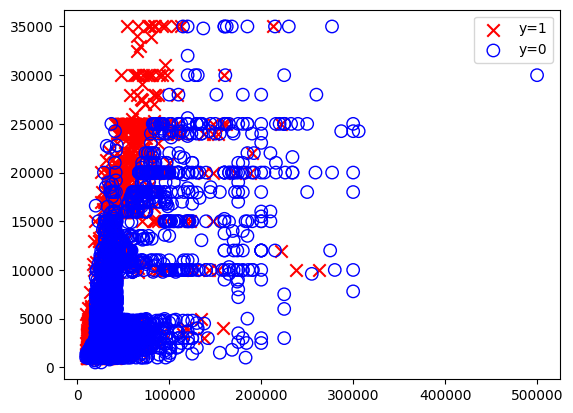

In [227]:
x = np.c_[income, loan_amnt]
plot_data(x[:5000], loan_status[:5000], plt)

## 1. Normalize

Let's take only income and loan amount to start

In [306]:
income_norm = ((income - np.mean(income)) / (max(income) - min(income)))  *2
loan_amnt_norm = ((loan_amnt - np.mean(loan_amnt)) / (max(loan_amnt) - min(loan_amnt)))  *2

In [307]:
x_train_norm = np.c_[income_norm, loan_amnt_norm]
y_train = loan_status

In [314]:
income_norm

array([-0.05529305, -0.05529305, -0.00037563, ...,  0.0099398 ,
        0.08263907, -0.02346256])

In [315]:
loan_amnt_norm

array([-0.49787465, -0.23700508,  1.47313984, ...,  1.47313984,
        0.31371955, -0.18048334])

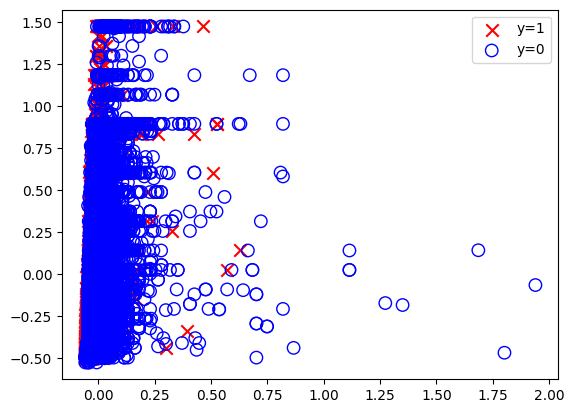

In [313]:
plot_data(x_train_norm[:-1], y_train[:-1], plt)

## 2. Gradient descent

In [231]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

In [232]:
def compute_cost_logistic(X, y, w, b):

    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        z_i = np.dot(X[i],w) + b
        f_wb_i = sigmoid(z_i)
        cost +=  -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)
             
    cost = cost / m
    return cost


In [233]:
def compute_descent(x, y, w, b):
    m = x.shape[0]
    n = x.shape[1]
    dj_dw = np.zeros(n)
    dj_db = 0

    for i in range(m):
        f_wb = sigmoid(np.dot(x[i], w) + b)
        err = (f_wb - y[i])
        for j in range(n):
            dj_dw[j] += err * x[i, j]
        dj_db += err


    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_db, dj_dw

In [234]:
compute_descent(x_train_norm, y_train, np.array([0, 0]), 0)

(0.28182655410590945, array([ 0.0035919 , -0.01592056]))

In [235]:
def gradient_descent(X, y, w_in, b_in, alpha, num_iters): 
    J_history = []
    w = copy.deepcopy(w_in)
    b = b_in
    
    for i in range(num_iters):
        dj_db, dj_dw = compute_descent(X, y, w, b)   
        
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        J_history.append(compute_cost_logistic(X, y, w, b))
        
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}")
        
    return w, b, J_history


In [281]:
w, b, J_history = gradient_descent(x_train_norm, y_train, np.array([0, 0]), 0, 10, 100)

Iteration    0: Cost 0.6702923780095511
Iteration   10: Cost 0.5174709279986943
Iteration   20: Cost 0.5158087947092828
Iteration   30: Cost 0.5142617239828127
Iteration   40: Cost 0.5128058058966259
Iteration   50: Cost 0.5114295057132223
Iteration   60: Cost 0.5101239063649888
Iteration   70: Cost 0.5088818738635132
Iteration   80: Cost 0.5076975481066862
Iteration   90: Cost 0.5065660132608072


In [282]:
w, b

(array([-3.67776157,  0.80954574]), -1.299164672461129)

In [258]:
def predict(x, w, b):
    return sigmoid(np.dot(x, w) + b)

In [267]:
correct = 0
for i in range(m):
    pr = predict(x_train_norm[i], w, b)
    if pr >= 0.5:
        print(pr)

print(correct)

0


## 3. Play with input

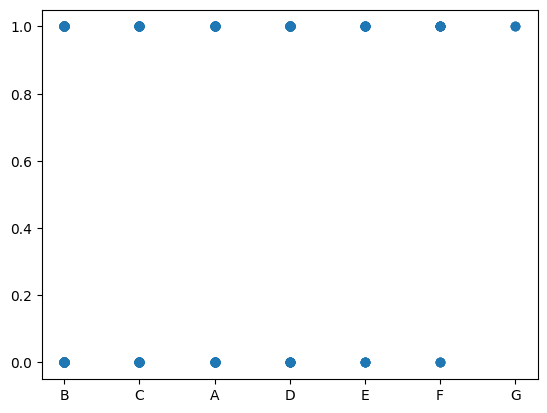

In [28]:
plt.scatter(loan_grade[:500], loan_status[:500])

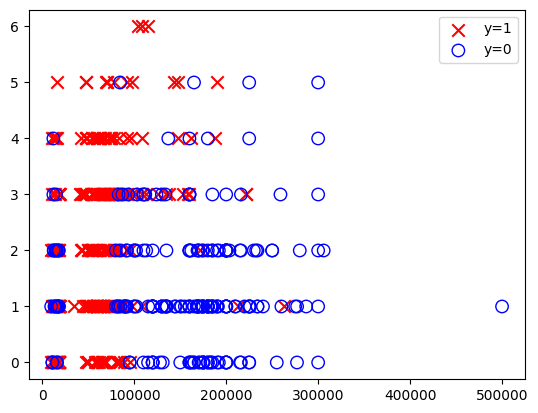

In [65]:
x = np.c_[income, loan_grade]
plot_data(x[:500], loan_status[:500], plt)

In [152]:
income_norm = ((income - np.mean(income)) / (max(income) - min(income)))  *2
loan_amnt_norm = ((loan_amnt - np.mean(loan_amnt)) / (max(loan_amnt) - min(loan_amnt)))  *2
empl_length_norm = ((empl_length - np.mean(empl_length)) / (max(empl_length) - min(empl_length)))  *2
loan_grade_norm = ((loan_grade - np.mean(loan_grade)) / (max(loan_grade) - min(loan_grade)))  *2
cred_hist_length_norm = ((cred_hist_length - np.mean(cred_hist_length)) / (max(cred_hist_length) - min(cred_hist_length)))  *2
age_norm = ((age - np.mean(age)) / (max(age) - min(age)))  *2

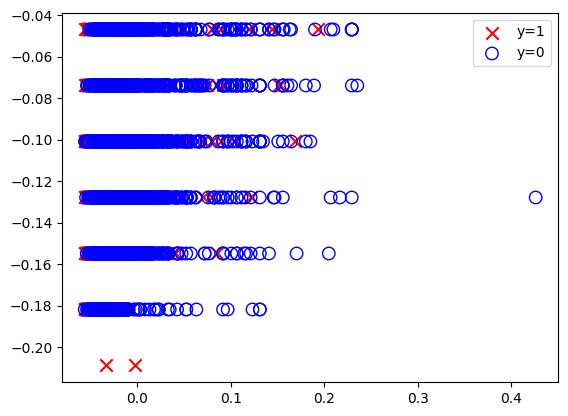

In [153]:
x = np.c_[income_norm, age_norm]
plot_data(x[:5000], loan_status[:5000], plt)

In [160]:
x_train_norm = np.c_[income_norm, loan_amnt_norm, empl_length_norm, cred_hist_length_norm, age_norm]
y_train = loan_status

In [161]:
w, b, J_history = gradient_descent(x_train_norm, y_train, np.array([0, 0, 0, 0, 0]), 0, 1, 100)

Iteration    0: Cost 0.6219523654595848
Iteration   10: Cost 0.5196621495115843
Iteration   20: Cost 0.5167444763446545
Iteration   30: Cost 0.5156012354174266
Iteration   40: Cost 0.5148228556035792
Iteration   50: Cost 0.5142555678455916
Iteration   60: Cost 0.513818897298383
Iteration   70: Cost 0.5134633688440384
Iteration   80: Cost 0.5131585525769602
Iteration   90: Cost 0.512885780354722


# 4. Check correctness

In [162]:
correct = 0
for i in range(m):
    correct += (predict(x_train_norm[i], w, b) >= 0.5) == y_train[i]

print(correct / m)

0.7845643939393939


In [180]:
fatal_error = 0
for i in range(m):
    if (predict(x_train_norm[i], w, b) >= 0.5):
        fatal_error += 1
        print(i)

print(fatal_error)

0


In [181]:
w

array([-0.38523821,  0.65769889, -0.23930728, -0.09775364, -0.09972752])

## Graph

In [244]:
y_mask_default = y_train != 0
y_mask_no_default = (y_train == 0)
f'1: {len(x_train_norm[y_mask_default])}, 0: {len(x_train_norm[y_mask_no_default])}'

'1: 7107, 0: 25468'

In [245]:
x_train_norm_1 = x_train_norm[y_mask_default] # default - X
x_train_norm_0 = x_train_norm[y_mask_no_default] # no default - O

In [246]:
def bound_line(x1, w1, w2, b):
    return (-1 * w1 * x1 - b) / w2

In [283]:
x_bound = np.array([-0.05, 0.1])
y_bound = np.array([bound_line(x_bound[0], w[0], w[1], b),
                    bound_line(x_bound[1], w[0], w[1], b)])

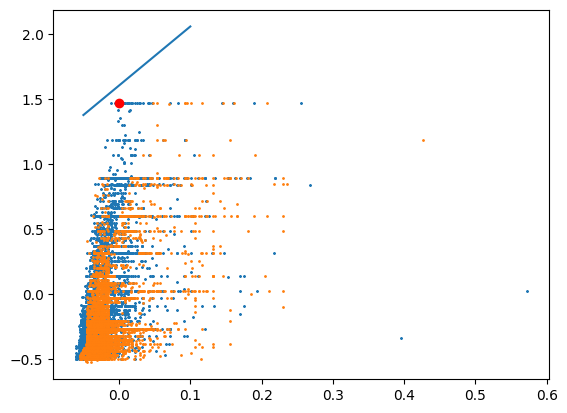

In [284]:
SHOW_CNT = 5000
plt.scatter(x_train_norm_1[:SHOW_CNT,0], x_train_norm_1[:SHOW_CNT,1], marker='X', s = 1)
plt.scatter(x_train_norm_0[:SHOW_CNT,0], x_train_norm_0[:SHOW_CNT,1], marker='o', s = 1)
plt.scatter([x_train_norm[2][0]], [x_train_norm[2][1]], c='r')
plt.plot(x_bound, y_bound)

# 5. Try z-score noramlization

In [287]:
from sklearn.preprocessing import StandardScaler

In [288]:
scaler = StandardScaler()

In [333]:
x_train = np.c_[income, loan_amnt]
x_train_norm = scaler.fit_transform(x_train)
y_train = loan_status

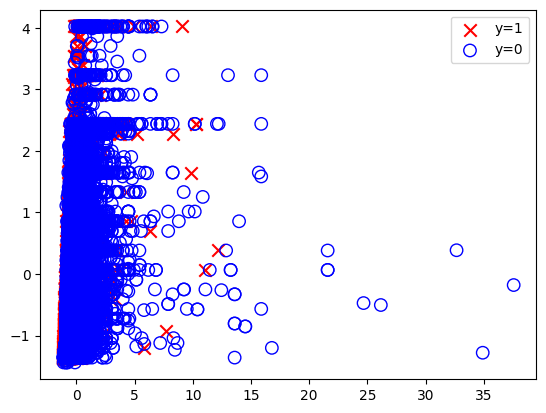

In [335]:
plot_data(x_train_norm[:-1], y_train[:-1], plt)

In [337]:
w, b, J_history = gradient_descent(x_train_norm, y_train, np.array([0, 0]), 0, 10, 20)

Iteration    0: Cost 0.613344204288291
Iteration    2: Cost 0.47095726707124497
Iteration    4: Cost 0.46715040119303597
Iteration    6: Cost 0.46600453253755636
Iteration    8: Cost 0.4656496563189233
Iteration   10: Cost 0.46553569544411416
Iteration   12: Cost 0.46549686227603776
Iteration   14: Cost 0.4654826821615291
Iteration   16: Cost 0.4654771768684313
Iteration   18: Cost 0.46547494196281636


In [294]:
w, b

(array([-1.78004689,  0.71966343]), -1.6350758189032584)

In [303]:
x_train_norm_1 = x_train_norm[y_mask_default] # default - X
x_train_norm_0 = x_train_norm[y_mask_no_default] # no default - O

In [304]:
x_bound = np.array([-2, 1])
y_bound = np.array([bound_line(x_bound[0], w[0], w[1], b),
                    bound_line(x_bound[1], w[0], w[1], b)])

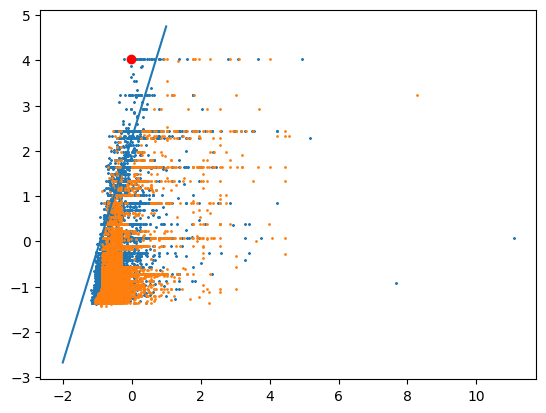

In [305]:
SHOW_CNT = 5000
plt.scatter(x_train_norm_1[:SHOW_CNT,0], x_train_norm_1[:SHOW_CNT,1], marker='X', s = 1)
plt.scatter(x_train_norm_0[:SHOW_CNT,0], x_train_norm_0[:SHOW_CNT,1], marker='o', s = 1)
plt.scatter([x_train_norm[2][0]], [x_train_norm[2][1]], c='r')
plt.plot(x_bound, y_bound)

In [338]:
correct = 0
for i in range(m):
    pr = predict(x_train_norm[i], w, b)
    if (pr >= 0.5) == y_train[i]:
        correct += 1

print(correct / m)

0.7934612432847276


## Conclusion ##
**Normalization is half of success!!!**
If poor normalization is bad, then:
1. It takes a long time to get things working, many iterations are required
2. In the end, learning doesn't result in anything useful!!!

# 6. Try non-linear input

In [321]:
scaler = StandardScaler()

In [322]:
x_train = np.c_[income, loan_amnt, income**2, loan_amnt**2, income * loan_amnt]
x_train_norm = scaler.fit_transform(x_train)
y_train = loan_status

In [327]:
w, b, J_history = gradient_descent(x_train_norm, y_train, np.array([0, 0, 0, 0, 0]), 0, 1, 100)

Iteration    0: Cost 0.6152109890121044
Iteration   10: Cost 0.4883042256485651
Iteration   20: Cost 0.47624041112706855
Iteration   30: Cost 0.47111527252794905
Iteration   40: Cost 0.46841477230120787
Iteration   50: Cost 0.46687482238293737
Iteration   60: Cost 0.46595293091544
Iteration   70: Cost 0.4653820039287714
Iteration   80: Cost 0.4650193880336456
Iteration   90: Cost 0.4647844604055332


In [332]:
correct = 0
for i in range(m):
    pr = predict(x_train_norm[i], w, b)
    if (pr >= 0.5) == y_train[i]:
        correct += 1

print(correct / m)

0.7890099769762088
